In [1]:
# In this notebook we will be doing some sentiment analysis in python using two different techniques:

# VADER (Valence Aware Dictionary and sentiment Reasoner) - Bag of words approach
# ->VADER: each word individualy not analyze sequential meaning
# Roberta Pretrained Model from 🤗
# ->Roberta:analyze sequential meaning
# Huggingface Pipeline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read in data
df = pd.read_csv('Reviews.csv')
df.shape

(568454, 10)

In [4]:
df = df.head(20000) #data set is very large so here we take 20000 only
df.shape

(20000, 10)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# EDA

In [6]:
df['Score'].value_counts().sort_index()

1     1824
2     1120
3     1649
4     2836
5    12571
Name: Score, dtype: int64

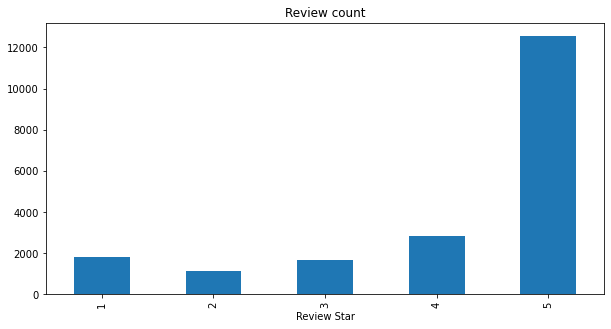

In [7]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Review count',figsize=(10,5))
ax.set_xlabel('Review Star')
plt.show()

In [ ]:
example=df['Text'][10]
print(example)

In [9]:
tokens=nltk.word_tokenize(example)[:10]
tokens

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
# nltk.download('averaged_perceptron_tagger')

In [11]:
tagged=nltk.pos_tag(tokens)
tagged[:4]

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB')]

In [12]:
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [13]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ)


# Approch 1:

In [14]:
# approch1: VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [15]:
# nltk.download('vader_lexicon')

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores('that is good')

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [18]:
sia.polarity_scores('that is not good')

{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'compound': -0.3412}

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
#polarity score for dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)): #what is iterrows do????
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [21]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0430,0.0330,0.0000,0.0530,0.0000,0.0430,0.0480,0.0000,0.0380,0.0210
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.6690,0.7630,0.6890,0.8190,0.7570,0.8300,0.7830,0.8630,0.7220,0.8540
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2890,0.2040,0.3110,0.1280,0.2430,0.1270,0.1690,0.1370,0.2400,0.1240
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.8442,0.7264,0.8218,0.5239,0.8519,0.6374,0.7567,0.9382,0.9688,0.8908


In [22]:
vaders=pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
19996,0.043,0.830,0.127,0.6374
19997,0.048,0.783,0.169,0.7567
19998,0.000,0.863,0.137,0.9382
19999,0.038,0.722,0.240,0.9688


In [23]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
19995,19996,0.043,0.830,0.127,0.6374
19996,19997,0.048,0.783,0.169,0.7567
19997,19998,0.000,0.863,0.137,0.9382
19998,19999,0.038,0.722,0.240,0.9688


In [24]:
vaders=vaders.merge(df,how='left')

In [25]:
#Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


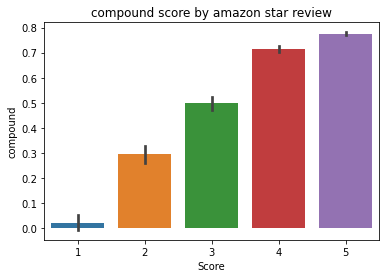

In [26]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('compound score by amazon star review')
plt.show()

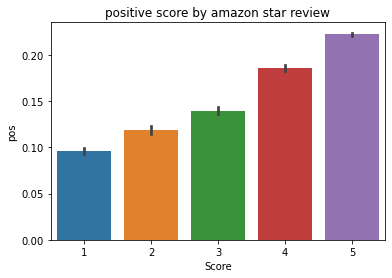

In [27]:
ax=sns.barplot(data=vaders,x='Score',y='pos')
ax.set_title('positive score by amazon star review')
plt.show()

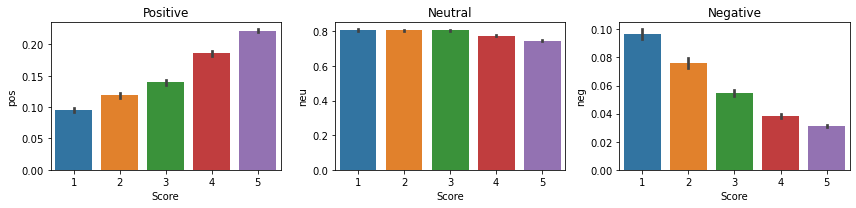

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Approch 2:

In [29]:
# approch 2: Roberta Pretrained Model
# Use a model trained of a large corpus of data.
# Transformer model accounts for the words but also the context related to other words.

In [30]:
# !pip install torch torchvision
!pip install AutoModelForSequenceClassification'

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: "AutoModelForSequenceClassification'"

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from transformers import AutoTokenizer#tokenize like nltk
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [33]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [34]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687474, 'roberta_pos': 0.0029573701}


In [35]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [36]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    break

  0%|          | 0/20000 [00:00<?, ?it/s]

In [37]:
{**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta_neg': 0.009624246,
 'roberta_neu': 0.049980413,
 'roberta_pos': 0.9403955}

In [38]:
{**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta_neg': 0.009624246,
 'roberta_neu': 0.049980413,
 'roberta_pos': 0.9403955}

In [39]:
#rename vader 
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    break

  0%|          | 0/20000 [00:00<?, ?it/s]

In [40]:
{**vader_result_rename, **roberta_result}

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441,
 'roberta_neg': 0.009624246,
 'roberta_neu': 0.049980413,
 'roberta_pos': 0.9403955}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/20000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

In [ ]:
#compare score between tow model
sns.pairplot(data=results_df,
            vars=['vader_neg','vader_neu','vader_pos',
                  'roberta_neg','roberta_neu','roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
#look at some example where the model scoring and review score differ the most

In [ ]:
#actual score is 1 but seems like positive at strting point(values[0] give more positive among 1 star review )
results_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==5').sort_values('roberta_neg',ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

In [ ]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis") #download default model and embedding for this pipe line so only two line code
#can change diff model and tokenizer

In [ ]:
sent_pipeline('thats nice')